In [1]:
from graphs import Figure, DataSeries
from data_sources import DataSource
import sympy as sp
import numpy as np
import os


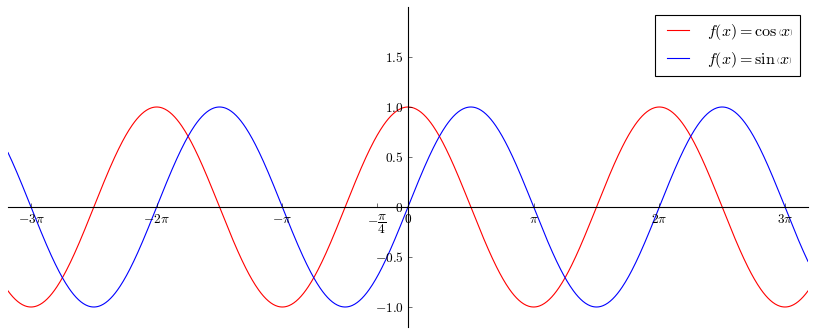

In [5]:

my_graph = Figure()
x = sp.symbols('x')

docs_dir = DataSource().docs_directory

cos_data=  DataSeries()
cos_data.domain.min = -10
cos_data.domain.max = 10
cos_data.expression = sp.cos(x)
cos_data.style.colour = 'red'
my_graph.axes.add_plot_data(cos_data)

sin_data=  DataSeries()
sin_data.domain.min = -10
sin_data.domain.max = 10
sin_data.expression = sp.sin(x)
sin_data.style.colour = 'blue'
my_graph.axes.add_plot_data(sin_data)

my_graph._dimensions.height = 4 
my_graph._dimensions.width = 10
# my_graph.axes.display_x_ticks_in_degrees = True

my_graph.axes.x_axis_tick_symbolic_interval = sp.pi
my_graph.axes.x_ticks_symbolic = [-sp.pi/4, sp.pi]
my_graph.axes.y_axis_tick_interval = 0.5

my_graph.axes.display_buffer.top = 0.5
my_graph.axes.display_buffer.right = 0
my_graph.axes.display_buffer.left = 0
my_graph.axes.legend_location = 'upper right'
my_graph.render()  



fname = docs_dir + os.path.sep + 'testfile.jpg'
# my_graph.save(fname)


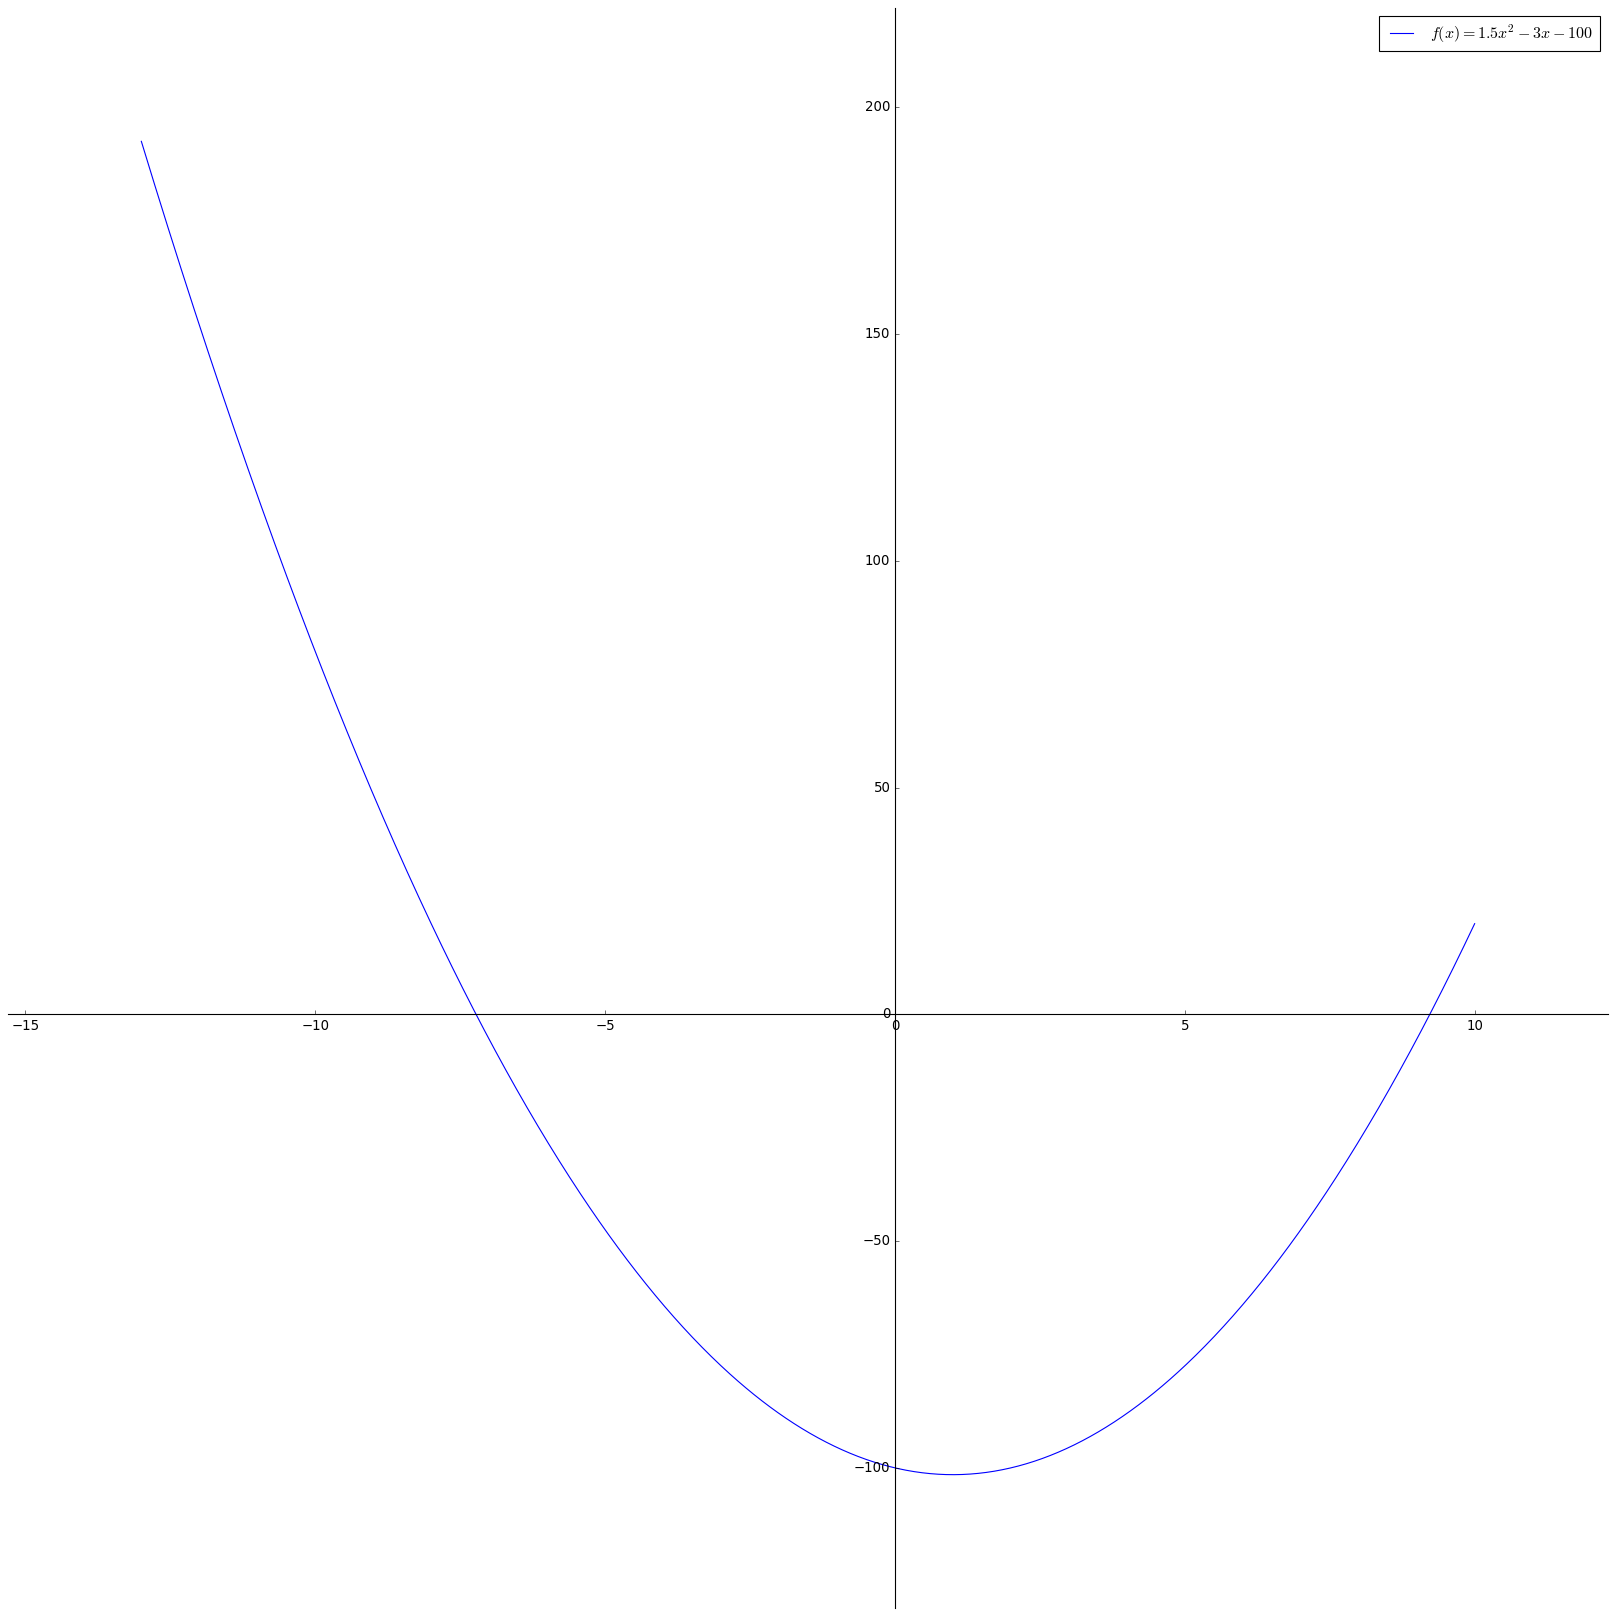

In [9]:
my_graph = Figure()
x = sp.symbols('x')

parabola = DataSeries()
parabola.domain.min = -13
parabola.domain.max = 10
parabola.expression = 3/2*x**2 -3*x - 100
my_graph.axes.add_plot_data(parabola)

my_graph.render()


In [2]:
t = (4,5)

t[1]

5